In [88]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import xgboost
from xgboost import XGBClassifier

In [2]:
data = pd.read_csv('Bank Data.csv')

In [3]:
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


In [4]:
data.shape

(50000, 27)

In [5]:
data.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

In [6]:
for col in data.columns:
    print(f'{col} : {pd.api.types.infer_dtype(data[col])}')

ID : string
Customer_ID : string
Month : string
Name : string
Age : string
SSN : string
Occupation : string
Annual_Income : string
Monthly_Inhand_Salary : floating
Num_Bank_Accounts : integer
Num_Credit_Card : integer
Interest_Rate : integer
Num_of_Loan : string
Type_of_Loan : string
Delay_from_due_date : integer
Num_of_Delayed_Payment : string
Changed_Credit_Limit : string
Num_Credit_Inquiries : floating
Credit_Mix : string
Outstanding_Debt : string
Credit_Utilization_Ratio : floating
Credit_History_Age : string
Payment_of_Min_Amount : string
Total_EMI_per_month : floating
Amount_invested_monthly : string
Payment_Behaviour : string
Monthly_Balance : string


In [7]:
data.isnull().sum()

ID                             0
Customer_ID                    0
Month                          0
Name                        5015
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary       7498
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                5704
Delay_from_due_date            0
Num_of_Delayed_Payment      3498
Changed_Credit_Limit           0
Num_Credit_Inquiries        1035
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          4470
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     2271
Payment_Behaviour              0
Monthly_Balance              562
dtype: int64

# Observations: 
 There are missing value present in the data <br>
 Train dataset has both numerical and string value

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,42502.0,4182.004291,3174.109304,303.645417,1625.188333,3086.305000,5934.189094,15204.633333
Num_Bank_Accounts,50000.0,16.838260,116.396848,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,50000.0,22.921480,129.314804,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,50000.0,68.772640,451.602363,1.000000,8.000000,13.000000,20.000000,5799.000000
Delay_from_due_date,50000.0,21.052640,14.860397,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,48965.0,30.080200,196.984121,0.000000,4.000000,7.000000,10.000000,2593.000000
Credit_Utilization_Ratio,50000.0,32.279581,5.106238,20.509652,28.061040,32.280390,36.468591,48.540663
Total_EMI_per_month,50000.0,1491.304305,8595.647887,0.000000,32.222388,74.733349,176.157491,82398.000000


In [9]:
data.describe(exclude=np.number).T

,count,unique,top,freq
ID,50000,50000,0x160a,1
Customer_ID,50000,12500,CUS_0xd40,4
Month,50000,4,September,12500
Name,44985,10139,Stevex,22
Age,50000,976,39,1493
SSN,50000,12501,#F%$D@*&8,2828
Occupation,50000,16,_______,3438
Annual_Income,50000,16121,109945.32,8
Num_of_Loan,50000,263,2,7173
Type_of_Loan,44296,6260,Not Specified,704


# Observation
1. Customer ID has 12500 unique id which means we have 12500 customer's data
2. Age has 976 unique value which is not normal for real life cause generally age range from 0-1000
3. SSN is 12501 and Customer ID has only 12500 unique values that means one incorrect SSN value has entered for one customer cause same person cant have multiple SSN value

In [10]:
data_copy = data.copy()

In [11]:
data_copy.drop(["ID", "Name","SSN"], axis=1,inplace=True, errors="ignore")

In [12]:
data_copy.head(2)

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,CUS_0xd40,September,23,Scientist,19114.12,1824.843333,3,4,3,4,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,CUS_0xd40,October,24,Scientist,19114.12,1824.843333,3,4,3,4,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196


In [13]:
data_copy.describe(exclude=np.number).T

,count,unique,top,freq
Customer_ID,50000,12500,CUS_0xd40,4
Month,50000,4,September,12500
Age,50000,976,39,1493
Occupation,50000,16,_______,3438
Annual_Income,50000,16121,109945.32,8
Num_of_Loan,50000,263,2,7173
Type_of_Loan,44296,6260,Not Specified,704
Num_of_Delayed_Payment,46502,443,19,2622
Changed_Credit_Limit,50000,3927,_,1059
Credit_Mix,50000,4,Standard,18379


# Observation
1. There are some column contained _ value
2. There are columns which is String type but should be in float or int type

In [14]:
data.duplicated().value_counts()

False    50000
Name: count, dtype: int64

In [15]:
Before_Clean = data_copy.shape
Before_Clean

(50000, 24)

# Data Cleaning

In [16]:
data_copy = data_copy[data_copy.isnull().sum(axis=1)<4] 
data_copy.shape #if 4 or more than 4 Nan values exist in a row will be removed from dataset

(49969, 24)

In [17]:
wrong_types = ['Age','Annual_Income','Num_of_Loan','Num_of_Delayed_Payment','Changed_Credit_Limit',
               'Outstanding_Debt','Amount_invested_monthly','Monthly_Balance']

There are three colum in wrong types Monthly_Balance,Amount_invested_monthly, Changed_Credit_Limit containing _ value which will not be convert from string to float

In [18]:
data_copy.loc[data_copy.Monthly_Balance == '__-333333333333333333333333333__','Monthly_Balance'] = np.nan
data_copy.loc[data_copy.Amount_invested_monthly == '__10000__','Amount_invested_monthly'] = '10000'
data_copy.loc[data_copy.Changed_Credit_Limit == '_','Changed_Credit_Limit'] = np.nan

In [19]:
for col in wrong_types:
    data_copy[col] = data_copy[col].str.replace('_',' ').astype('float64')

In [20]:
data_copy.dtypes

Customer_ID                  object
Month                        object
Age                         float64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                 float64
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
dtype: object

Separating numerical and categorical columns

In [21]:
numerical = data_copy.select_dtypes(include=['float64','int64']).columns
numerical

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance'],
      dtype='object')

In [22]:
categorical = data_copy.select_dtypes(include=['object']).columns
categorical

Index(['Customer_ID', 'Month', 'Occupation', 'Type_of_Loan', 'Credit_Mix',
       'Credit_History_Age', 'Payment_of_Min_Amount', 'Payment_Behaviour'],
      dtype='object')

Age,Annual_Income and Occupation fixed for each customer group

In [23]:
data_copy.Age = data_copy.groupby('Customer_ID').Age.transform(lambda x : x.mode()[0])
data_copy.Annual_Income = data_copy.groupby('Customer_ID').Annual_Income.transform(lambda x : x.mode()[0])
data_copy.Occupation = data_copy.groupby('Customer_ID').Occupation.transform(lambda x : x.mode()[0])

In [24]:
for col in numerical:    
    if data_copy[col][data_copy[col] < 0].any():
        print(col,len(data_copy[col][data_copy[col] < 0])) #Showing Negative values in numerical columns

Age 44
Num_Bank_Accounts 16
Num_of_Loan 1973
Delay_from_due_date 298
Num_of_Delayed_Payment 287
Changed_Credit_Limit 834


Num_Bank_Accounts,Num_of_Loan (can't be negative)
Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Monthly_Balance (can be negative)

In [25]:
data_copy.Num_Bank_Accounts[data_copy.Num_Bank_Accounts < 0].value_counts()#always -1 so it's definitely a mistake

Num_Bank_Accounts
-1    16
Name: count, dtype: int64

In [26]:
data_copy.Num_of_Loan[data_copy.Num_of_Loan<0].value_counts()#always -100 so it's definitely a mistake

Num_of_Loan
-100.0    1973
Name: count, dtype: int64

In [27]:
data_copy.drop(data_copy[data_copy.Num_of_Loan < 0].index,inplace=True)

In [28]:
data_copy.reset_index(drop=True,inplace=True)

In [29]:
for col in numerical:    
    if data_copy[col][data_copy[col] < 0].any():
        print(col,len(data_copy[col][data_copy[col] < 0]))

Age 42
Num_Bank_Accounts 16
Delay_from_due_date 282
Num_of_Delayed_Payment 273
Changed_Credit_Limit 803


In [30]:
data_copy.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,47996.000000,47996.000000,40836.000000,47996.000000,47996.000000,47996.000000,47996.000000,47996.000000,44663.000000,46986.000000,47004.000000,47996.000000,47996.000000,47996.000000,45818.000000,47454.000000
mean,33.301650,50419.124354,4175.464513,16.704309,22.802067,68.355946,7.646700,21.064547,30.681817,10.376507,30.141988,1424.138036,32.277972,1490.571264,639.022442,402.505438
std,19.098267,38256.894079,3171.056592,115.892851,128.690447,449.918682,64.235878,14.874717,220.213959,6.788960,197.480775,1152.613848,5.104142,8593.270446,2048.367231,213.349014
min,-500.000000,7005.930000,303.645417,-1.000000,0.000000,1.000000,0.000000,-5.000000,-3.000000,-6.450000,0.000000,0.230000,20.509652,0.000000,0.000000,0.103402
25%,25.000000,19328.710000,1623.130833,3.000000,4.000000,8.000000,2.000000,10.000000,9.000000,5.330000,4.000000,565.220000,28.065867,32.242837,74.514319,270.219854
50%,33.000000,36969.100000,3081.893177,6.000000,5.000000,13.000000,3.000000,18.000000,14.000000,9.420000,7.000000,1166.910000,32.281640,74.702714,135.468384,336.589964
75%,42.000000,71609.640000,5917.510962,7.000000,7.000000,20.000000,5.000000,28.000000,18.000000,14.820000,10.000000,1943.210000,36.467705,175.965415,266.641170,470.080840
max,56.000000,179987.280000,15204.633333,1798.000000,1499.000000,5799.000000,1496.000000,67.000000,4399.000000,36.650000,2593.000000,4998.070000,48.540663,82398.000000,10000.000000,1606.518192


Age column has 42 negative values and all are -500 which are unusual

In [31]:
data_copy.loc[data_copy.Age == -500.000000,'Age'] = np.nan

In [32]:
data_copy.isnull().sum()   

Customer_ID                    0
Month                          0
Age                           42
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary       7160
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                5459
Delay_from_due_date            0
Num_of_Delayed_Payment      3333
Changed_Credit_Limit        1010
Num_Credit_Inquiries         992
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          4272
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     2178
Payment_Behaviour              0
Monthly_Balance              542
dtype: int64

Filling numerical columns Nulls

In [33]:
null_num_cols = ['Age','Monthly_Inhand_Salary','Num_of_Delayed_Payment','Changed_Credit_Limit','Num_Credit_Inquiries','Amount_invested_monthly','Monthly_Balance']
imputer = SimpleImputer(strategy='mean')
imputed_numerical = pd.DataFrame(imputer.fit_transform(data_copy[null_num_cols]),columns=null_num_cols)
imputed_numerical.isnull().sum()

Age                        0
Monthly_Inhand_Salary      0
Num_of_Delayed_Payment     0
Changed_Credit_Limit       0
Num_Credit_Inquiries       0
Amount_invested_monthly    0
Monthly_Balance            0
dtype: int64

In [34]:
data_copy[null_num_cols] = imputed_numerical

In [35]:
data_copy.isnull().sum()

Customer_ID                    0
Month                          0
Age                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                5459
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Changed_Credit_Limit           0
Num_Credit_Inquiries           0
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          4272
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly        0
Payment_Behaviour              0
Monthly_Balance                0
dtype: int64

Dealing with wrong values in categorical columns

In [36]:
data_copy.Occupation.value_counts()

Occupation
Lawyer           3394
Engineer         3311
Architect        3275
Accountant       3236
Scientist        3230
Media_Manager    3222
Mechanic         3215
Developer        3208
Entrepreneur     3195
Teacher          3192
Doctor           3151
Journalist       3143
Manager          3098
Musician         3063
Writer           3020
_______            43
Name: count, dtype: int64

'___' is a wrong value

In [37]:
data_copy.loc[data_copy.Occupation == '_______','Occupation'] = np.nan

In [38]:
data_copy.Type_of_Loan.value_counts()

Type_of_Loan
Not Specified                                                                                            678
Credit-Builder Loan                                                                                      614
Personal Loan                                                                                            611
Debt Consolidation Loan                                                                                  604
Student Loan                                                                                             591
                                                                                                        ... 
Not Specified, Credit-Builder Loan, Auto Loan, Personal Loan, and Payday Loan                              2
Credit-Builder Loan, Home Equity Loan, Credit-Builder Loan, Credit-Builder Loan, and Home Equity Loan      2
Mortgage Loan, Credit-Builder Loan, Mortgage Loan, Auto Loan, Payday Loan, and Credit-Builder Loan         2
Debt C

In [39]:
data_copy.Credit_Mix.value_counts()

Credit_Mix
Standard    17650
Good        11748
_            9434
Bad          9164
Name: count, dtype: int64

In [40]:
data_copy.Credit_Mix.unique()

array(['Good', '_', 'Standard', 'Bad'], dtype=object)

'_' is a wrong value

In [41]:
data_copy.loc[data_copy.Credit_Mix == '_', 'Credit_Mix'] = np.nan

<Axes: xlabel='count', ylabel='Credit_Mix'>

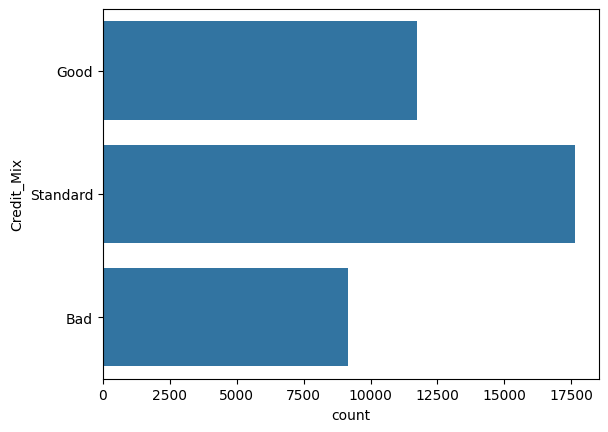

In [42]:
sns.countplot(data_copy.Credit_Mix)

In [43]:
data_copy.Credit_History_Age.value_counts()

Credit_History_Age
20 Years and 1 Months     250
19 Years and 7 Months     242
16 Years and 1 Months     240
18 Years and 6 Months     240
18 Years and 7 Months     239
                         ... 
4 Years and 4 Months       19
0 Years and 11 Months      16
33 Years and 11 Months     15
0 Years and 10 Months      13
34 Years and 0 Months      13
Name: count, Length: 399, dtype: int64

In [44]:
data_copy.Payment_of_Min_Amount.value_counts()

Payment_of_Min_Amount
Yes    25119
No     17108
NM      5769
Name: count, dtype: int64

'NM' is a wrong value

In [45]:
data_copy.loc[data_copy.Payment_of_Min_Amount == 'NM','Payment_of_Min_Amount'] = np.nan

<Axes: xlabel='count', ylabel='Payment_of_Min_Amount'>

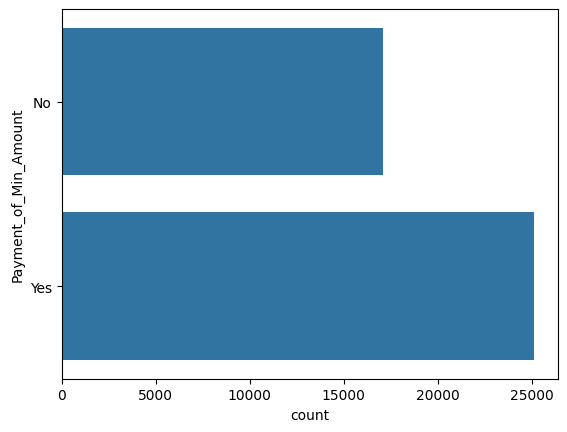

In [46]:
sns.countplot(data_copy.Payment_of_Min_Amount)

In [47]:
data_copy.Payment_Behaviour.value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      12215
High_spent_Medium_value_payments     8555
Low_spent_Medium_value_payments      6559
High_spent_Large_value_payments      6553
High_spent_Small_value_payments      5422
Low_spent_Large_value_payments       5045
!@9#%8                               3647
Name: count, dtype: int64

'!@9#%8' is a wrong value

In [48]:
data_copy.loc[data_copy.Payment_Behaviour == '!@9#%8','Payment_Behaviour'] = np.nan

<Axes: xlabel='count', ylabel='Payment_Behaviour'>

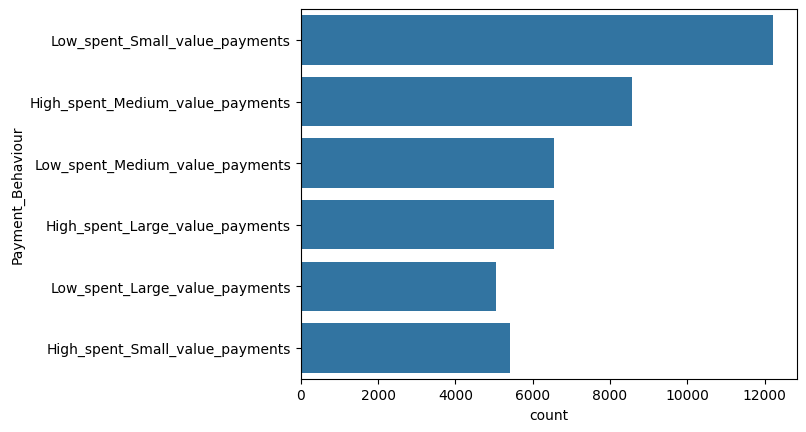

In [49]:
sns.countplot(data_copy.Payment_Behaviour)

In [50]:
data_copy.isnull().sum()

Customer_ID                    0
Month                          0
Age                            0
Occupation                    43
Annual_Income                  0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                5459
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Changed_Credit_Limit           0
Num_Credit_Inquiries           0
Credit_Mix                  9434
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          4272
Payment_of_Min_Amount       5769
Total_EMI_per_month            0
Amount_invested_monthly        0
Payment_Behaviour           3647
Monthly_Balance                0
dtype: int64

In [51]:
data_copy.drop(['Customer_ID'],axis=1,inplace=True)

In [52]:
categorical = categorical.drop('Customer_ID')

In [53]:
categorical = categorical.drop('Month')

In [54]:
categorical

Index(['Occupation', 'Type_of_Loan', 'Credit_Mix', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Payment_Behaviour'],
      dtype='object')

Filling Catgorical columns Nulls

In [55]:
imputer = SimpleImputer(strategy='most_frequent')
imputed_categorical = pd.DataFrame(imputer.fit_transform(data_copy[categorical]),columns=categorical)

In [56]:
data_copy[categorical] = imputed_categorical

In [57]:
data_copy.isnull().sum().any()

False

There are no null values in the dataset

In [58]:
data_copy.shape

(47996, 23)

Checking the correlation to help dropping columns

<Axes: >

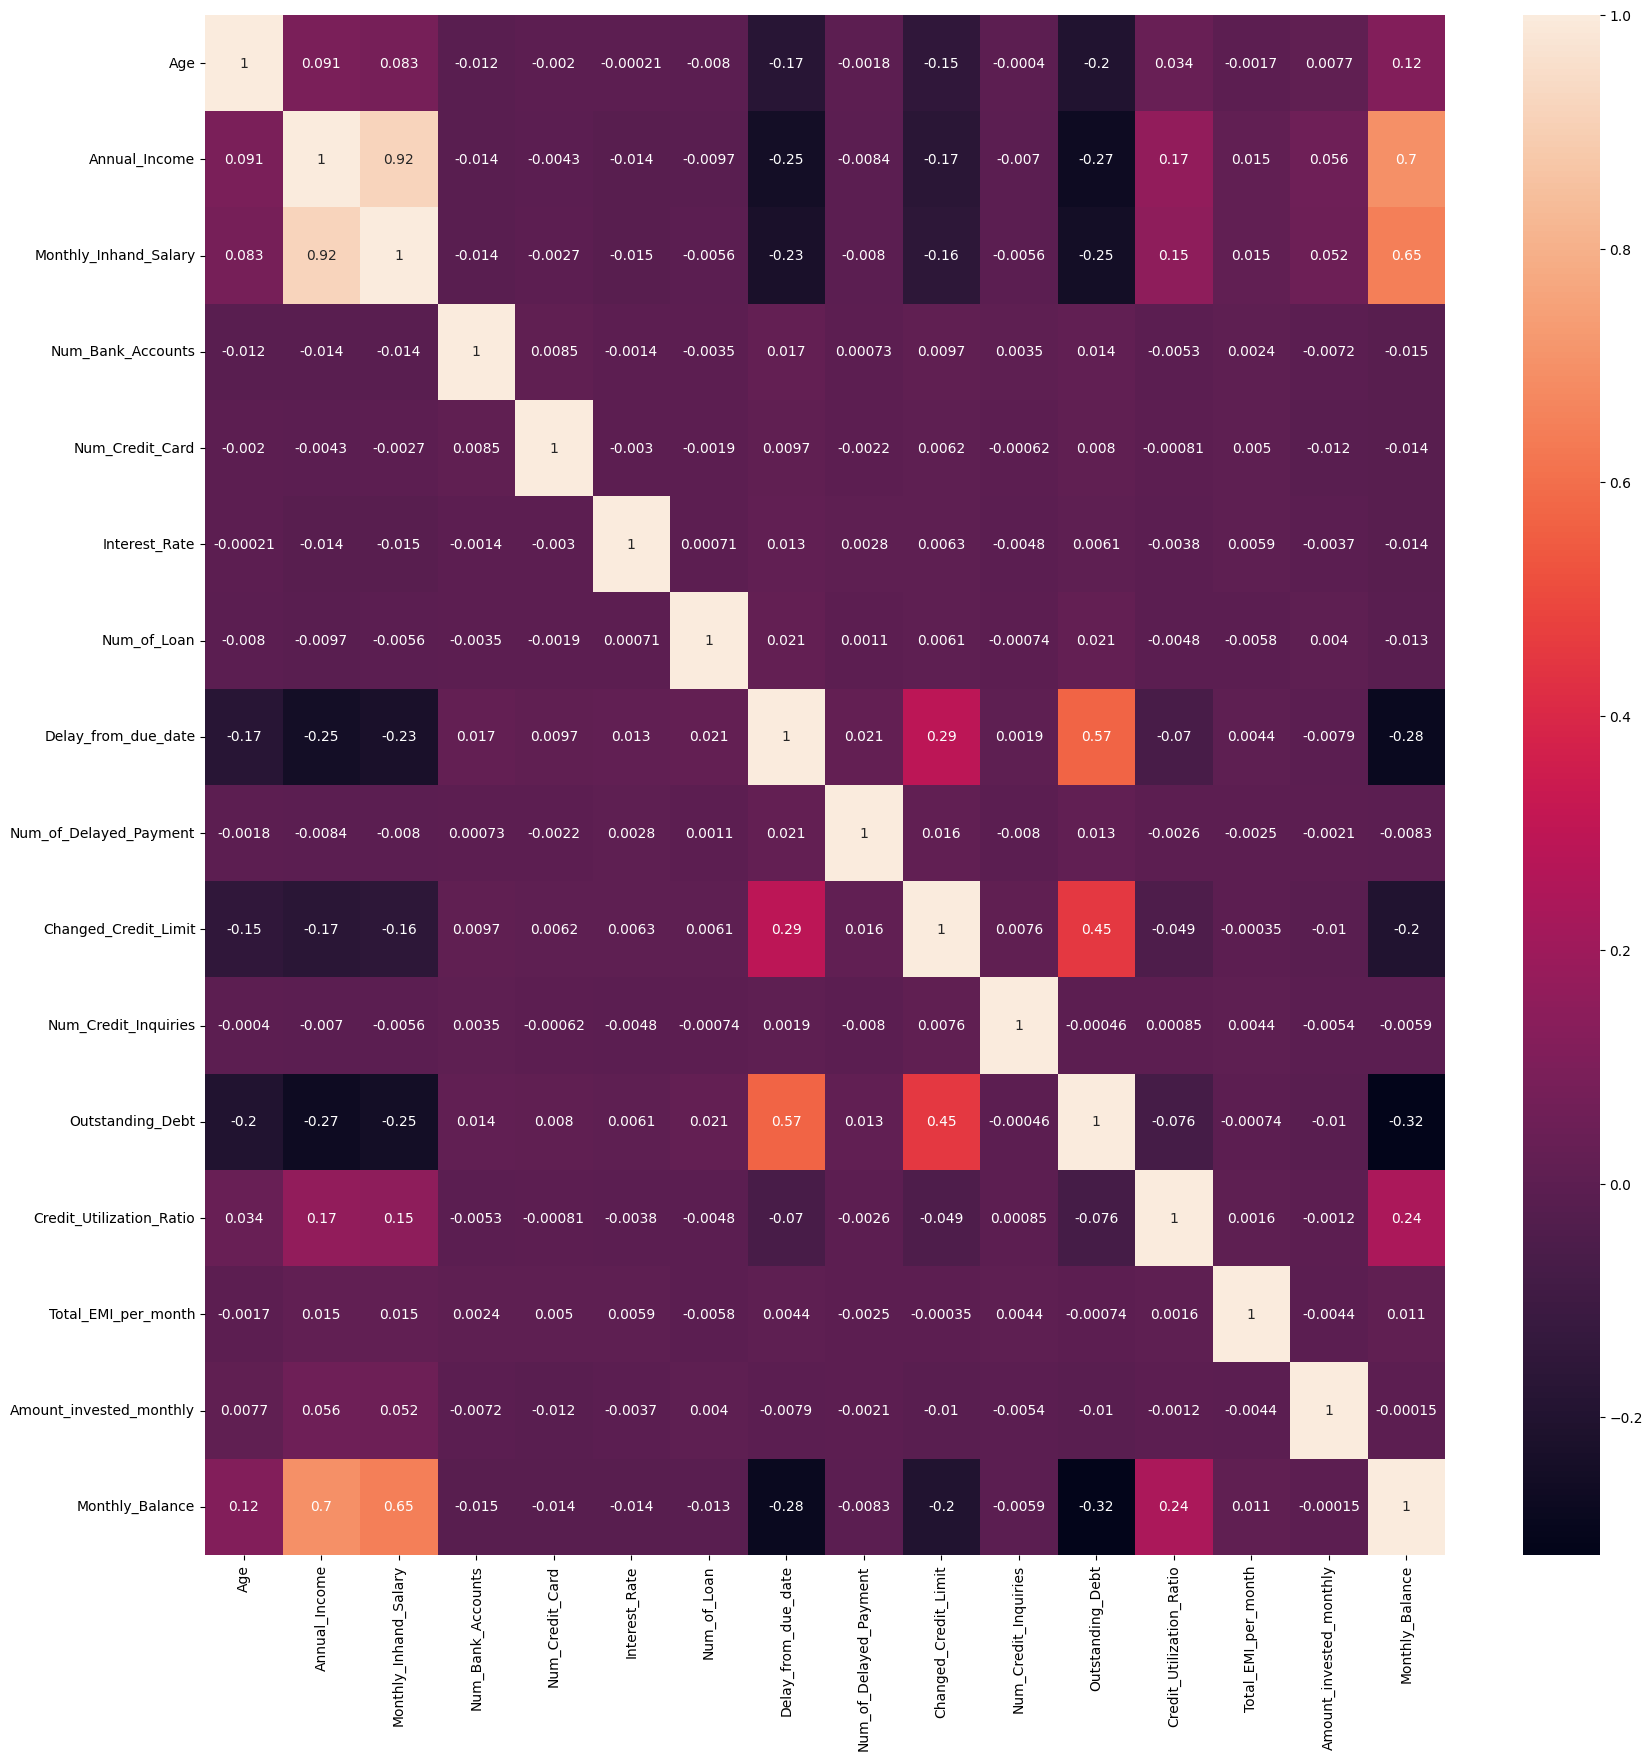

In [59]:
plt.figure(figsize=(20,20))
sns.heatmap(data_copy[numerical].corr(),annot=True)

<Axes: >

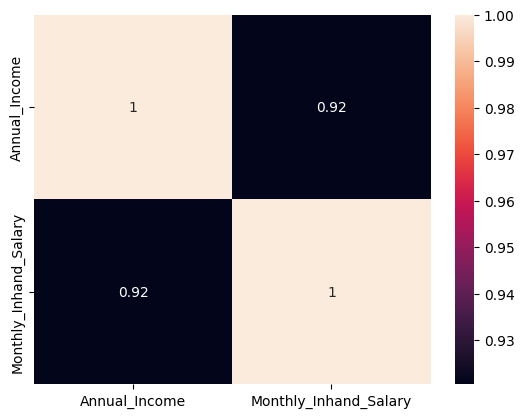

In [60]:
sns.heatmap(data_copy[['Annual_Income','Monthly_Inhand_Salary']].corr(),annot=True)

Its showing a high correlation between these two column

In [61]:
data_copy.drop(['Monthly_Inhand_Salary'],axis=1,inplace=True)

In [62]:
numerical = numerical.drop('Monthly_Inhand_Salary')
numerical

Index(['Age', 'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance'],
      dtype='object')

# Scaling and Encoding the features

In [63]:
data_copy[numerical] = StandardScaler().fit_transform(data_copy[numerical])

In [64]:
data_copy.describe()

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,4.799600e+04,4.799600e+04,4.799600e+04,4.799600e+04,4.799600e+04,4.799600e+04,4.799600e+04,4.799600e+04,4.799600e+04,4.799600e+04,4.799600e+04,4.799600e+04,4.799600e+04,4.799600e+04,4.799600e+04
mean,1.255397e-16,9.178609e-18,2.102197e-17,-1.598854e-17,-4.737346e-18,-9.474693e-18,-8.468007e-17,5.033430e-18,3.967528e-17,-1.450812e-17,6.099333e-17,4.577461e-16,2.250240e-17,2.487107e-17,-2.667718e-16
std,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00
min,-1.838351e+00,-1.134793e+00,-1.527661e-01,-1.771872e-01,-1.497085e-01,-1.190422e-01,-1.752290e+00,-1.585565e-01,-2.505034e+00,-1.542364e-01,-1.235386e+00,-2.305665e+00,-1.734598e-01,-3.192989e-01,-1.896882e+00
25%,-8.154295e-01,-8.126833e-01,-1.182511e-01,-1.461046e-01,-1.341500e-01,-8.790661e-02,-7.438570e-01,-1.020667e-01,-7.378964e-01,-1.337684e-01,-7.451993e-01,-8.252413e-01,-1.697076e-01,-2.808234e-01,-6.205238e-01
50%,-7.148699e-02,-3.515749e-01,-9.236480e-02,-1.383339e-01,-1.230367e-01,-7.233883e-02,-2.060260e-01,-7.382186e-02,-1.200682e-01,-1.184174e-01,-2.231716e-01,7.186373e-04,-1.647665e-01,-2.477789e-01,-3.014220e-01
75%,7.654484e-01,5.539063e-01,-8.373605e-02,-1.227926e-01,-1.074782e-01,-4.120326e-02,4.662627e-01,-5.499193e-02,6.302582e-01,-9.794944e-02,4.503480e-01,8.208582e-01,-1.529824e-01,-1.666480e-01,3.082093e-01
max,2.067348e+00,3.386828e+00,1.537035e+01,1.147104e+01,1.273720e+01,2.317037e+01,3.088189e+00,2.056378e+01,3.911447e+00,1.311413e+01,3.100752e+00,3.186208e+00,9.415306e+00,4.677379e+00,5.675592e+00


In [65]:
for col in categorical:
    data_copy[col] = LabelEncoder().fit_transform(data_copy[col])

In [66]:
categorical

Index(['Occupation', 'Type_of_Loan', 'Credit_Mix', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Payment_Behaviour'],
      dtype='object')

In [67]:
data_copy[categorical]

,Occupation,Type_of_Loan,Credit_Mix,Credit_History_Age,Payment_of_Min_Amount,Payment_Behaviour
0,12,128,1,181,0,5
1,12,128,1,172,0,1
2,12,128,1,147,0,4
3,12,128,1,182,0,1
4,13,684,1,235,0,0
...,...,...,...,...,...,...
47991,1,4913,2,147,1,5
47992,9,683,1,293,1,5
47993,9,683,1,302,0,3
47994,9,683,1,303,0,2


In [68]:
data_copy.drop('Month',axis=1,inplace=True)

In [69]:
X = data_copy.drop('Credit_Mix',axis=1)
y = data_copy.Credit_Mix

In [70]:
y.value_counts()

Credit_Mix
2    27084
1    11748
0     9164
Name: count, dtype: int64

In [71]:
label_encoder = LabelEncoder()
data['Credit_Mix_Encoded'] = label_encoder.fit_transform(data['Credit_Mix'])
data['Credit_Mix_Decoded'] = label_encoder.inverse_transform(data['Credit_Mix_Encoded'])

In [72]:
data['Credit_Mix_Encoded'].head(20)

0     1
1     1
2     1
3     1
4     1
5     1
6     3
7     3
8     1
9     1
10    1
11    1
12    1
13    3
14    1
15    1
16    3
17    2
18    2
19    2
Name: Credit_Mix_Encoded, dtype: int32

In [73]:
data['Credit_Mix_Decoded'].head(20)

0         Good
1         Good
2         Good
3         Good
4         Good
5         Good
6            _
7            _
8         Good
9         Good
10        Good
11        Good
12        Good
13           _
14        Good
15        Good
16           _
17    Standard
18    Standard
19    Standard
Name: Credit_Mix_Decoded, dtype: object

Here 0 means Poor, 1 means Good, 2 means Standard and 3 means -

In [74]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape

((38396, 20), (9600, 20))

# Random Forest

              precision    recall  f1-score   support

           0       0.80      0.94      0.86      1840
           1       0.79      0.92      0.85      2326
           2       0.93      0.82      0.87      5434

    accuracy                           0.86      9600
   macro avg       0.84      0.89      0.86      9600
weighted avg       0.87      0.86      0.86      9600



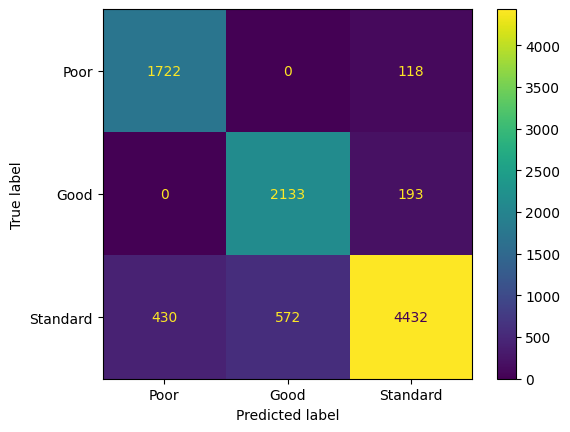

In [75]:
model = RandomForestClassifier(random_state=1234)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(classification_report(y_test,y_pred))
confusion_matrixDisply = ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=['Poor','Good','Standard'])
confusion_matrixDisply.plot()

# XGBoost

              precision    recall  f1-score   support

           0       0.80      0.95      0.86      1840
           1       0.79      0.91      0.84      2326
           2       0.93      0.81      0.87      5434

    accuracy                           0.86      9600
   macro avg       0.84      0.89      0.86      9600
weighted avg       0.87      0.86      0.86      9600



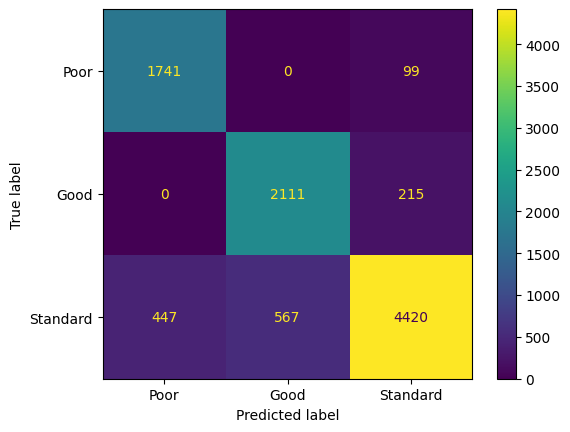

In [76]:
model = XGBClassifier(random_state=42)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(classification_report(y_test,y_pred))
confusion_matrixDisply = ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=['Poor','Good','Standard'])
confusion_matrixDisply.plot()

Random Forest Classifier Can model complex interactions and non-linear relationships but Can be biased if classes are highly imbalanced since the dataset is imbalanced so tried another model called Gradient Boosting Classifier (XGBoost) and it also giving the same accuracy as random forest

# XGBoost with Hyperparameter Tuning
Using Random search since the dataset is quite large

In [84]:
param_dist  = {
    'n_estimators': [101, 151, 201],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2,4,6,8],
    'min_samples_split': [2,3,4,5],
    'min_samples_leaf': [1, 2,3, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [85]:
xgb = XGBClassifier(random_state=42)

In [86]:
xgb_random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist, cv=5)
xgb_random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 2, 4, 6, 8],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 3, 4, 5],
                                        'n_estimators': [101, 151, 201]})

In [89]:
y_pred_rf_random = xgb_random_search.predict(x_test) 
print("\n XGBoost Random Search Performance:") 
print("Accuracy:", accuracy_score(y_test, y_pred_rf_random)) 
print("Classification Report:") 
print(classification_report(y_test, y_pred_rf_random))


 XGBoost Random Search Performance:
Accuracy: 0.8601041666666667
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.93      0.86      1840
           1       0.79      0.90      0.84      2326
           2       0.93      0.82      0.87      5434

    accuracy                           0.86      9600
   macro avg       0.84      0.88      0.86      9600
weighted avg       0.87      0.86      0.86      9600

